# **Advanced**

In [233]:
!pip install skope-rules
!pip install cubist
!pip install eli5
!pip install scikit-plot

In [234]:
#Import Library
import pandas as pd

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
#load logistic regression model
from sklearn.linear_model import LogisticRegression

# load navie bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5
#Load data link csv dari github
url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv'
df = pd.read_csv(url, index_col=0)
df = pd.read_csv(url, sep=";")

#Check data
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Preprocessing Data**

In [235]:
# remove id, customer_code, and co_name from dataset
mr_data = df.drop(
    ['ID', 'Year_Birth', 'Dt_Customer'],
    axis = 1
)

# check its first 5 rows
mr_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0


In [236]:
# count 'churned' class frequencies
mr_data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [237]:
#Check missing value
mr_data.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [238]:
#df['col'] = df['col'].fillna(0)
#df['col'] = df['col'].astype(np.int64)

In [239]:
mr_data['Income'] = mr_data['Income'].fillna(0).astype(np.int64).reset_index(drop=True)

In [240]:
mr_data = mr_data.reset_index(drop=True)

In [241]:
mr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   Income               2240 non-null   int64 
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

# **Simple EDA**

In [242]:
# check correlation matrix of mr_data
mr_data.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Income,1.000000,-0.424723,0.015498,-0.010603,0.570851,0.421910,0.565318,0.431879,0.424761,0.312600,...,-0.535452,-0.009682,0.174512,0.329995,0.267087,0.088132,-0.024489,NaN,NaN,0.136389
Kidhome,-0.424723,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,0.015498,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.010603,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,0.570851,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.421910,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,0.565318,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,0.431879,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331
MntSweetProducts,0.424761,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,...,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,NaN,NaN,0.117372
MntGoldProds,0.312600,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,...,-0.250719,0.123091,0.022268,0.181021,0.166396,0.049990,-0.030861,NaN,NaN,0.139850


Data variable yang memiliki multikolineritas adalah NumCatalogPurchases  dengan variable MntMeatProducts

remove 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumStorePurchases', 'Z_CostContact', , 'Z_Revenue',  because of no significant to ipluse the model,
and for 'NumCatalogPurchases' 0.723827, 'NumWebVisitsMonth' (1),  'Income' (1) have high value of multicolinerity 

In [243]:
# remove 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Income', 'Teenhome', 'Dt_Customer', 'NumStorePurchases', 'Z_CostContact', 'NumCatalogPurchases', 'Z_Revenue', 'NumWebVisitsMonth' 
mr_data = df.drop(
    ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Income', 'Teenhome', 'Dt_Customer', 
     'NumStorePurchases', 'Z_CostContact', 'NumCatalogPurchases', 'Z_Revenue', 'NumWebVisitsMonth','AcceptedCmp3', 
     'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2'],
    axis = 1
)

# check its first 5 rows
mr_data.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,Complain,Response
0,58,635,88,546,172,88,88,3,8,0,1
1,38,11,1,6,2,1,6,2,1,0,0
2,26,426,49,127,111,21,42,1,8,0,0
3,26,11,4,20,10,3,5,2,2,0,0
4,94,173,43,118,46,27,15,5,5,0,0


# Check Data Duplicate

In [244]:
mr_data.duplicated().sum()

190

In [245]:
mr_data.drop_duplicates(inplace=True)

In [246]:
mr_data.duplicated().sum()

0

In [247]:
mr_data = mr_data.reset_index(drop=True)

In [248]:
mr_data.head(5)

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,Complain,Response
0,58,635,88,546,172,88,88,3,8,0,1
1,38,11,1,6,2,1,6,2,1,0,0
2,26,426,49,127,111,21,42,1,8,0,0
3,26,11,4,20,10,3,5,2,2,0,0
4,94,173,43,118,46,27,15,5,5,0,0


In [249]:
df = pd.get_dummies(mr_data)

In [250]:
df.shape

(2050, 11)

In [251]:
df = df.fillna(0)

# **Train Tes Split**

In [252]:
from sklearn.model_selection import train_test_split

X = mr_data.drop(['Response'], axis=1)
y = mr_data[['Response']]

X_ARRAY = X.to_numpy()
Y_ARRAY = y.to_numpy() 

X_train, X_test, y_train, y_test = train_test_split(X_ARRAY, Y_ARRAY, test_size = 0.3, random_state = 123)

In [253]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler()
X_under, y_under = undersampling.fit_resample(X_train,y_train)

# **Normalization**

In [254]:
y.value_counts(normalize=True)

Response
0           0.848293
1           0.151707
dtype: float64

**Modeling using StatsModel**

Logit param:
```python
statsmodels.discrete.discrete_model.Logit(endog, exog, offset=None, check_rank=True, **kwargs)
```

In [255]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.363248
         Iterations 7


In [256]:
# check summary of model
logistic_reg_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.140     
Dependent Variable: y                AIC:              1064.5205 
Date:               2022-04-17 16:15 BIC:              1122.4786 
No. Observations:   1435             Log-Likelihood:   -521.26   
Df Model:           10               LL-Null:          -606.15   
Df Residuals:       1424             LLR p-value:      3.0706e-31
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -1.6660     0.2101   -7.9279   0.0000   -2.0778   -1.2541
x1        -0.0240     0.0030   -8.0471   0.0000   -0.0299   -0.0182
x2         0.0010     0.0003    3.7271   0.0002    0.0005    0.0015
x3         0.0003     0.0024    0.1174   0.9066   -0.0044    0.0049
x4         0.0020     0.0004    4.6551   0.0000    0.0011    0.0028
x5        -0.0041     0.0018   -2.2926   0.0219   -0.0076   -0.0006
x6         0.0007     0.0022    0.3144   0.7532   -0.0036    0.0049
x7         0.0036     0.0015    2.3971   0.0165    0.0007    0.0066
x8         0.0042     0.0413    0.1021   0.9187   -0.0767    0.0851
x9         0.0239     0.0328    0.7280   0.4666   -0.0405    0.0883
x10        0.8764     0.6953    1.2605   0.2075   -0.4863    2.2392
=================================================================

"""

In [257]:
# check model coefficient
logistic_reg_sm.params

array([-1.66596739e+00, -2.40442846e-02,  9.91775975e-04,  2.79568326e-04,
        1.96341307e-03, -4.07648839e-03,  6.82288803e-04,  3.64274081e-03,
        4.21469275e-03,  2.39073435e-02,  8.76444489e-01])

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(
  penalty='l2', *, dual=False, 
  tol=0.0001, C=1.0, 
  fit_intercept=True, intercept_scaling=1, 
  class_weight=None, random_state=None, 
  solver='lbfgs', max_iter=100, 
  multi_class='auto', verbose=0, 
  warm_start=False, n_jobs=None,
  l1_ratio=None
)
```

In [258]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1000)

In [259]:
# check model coefficient
logistic_reg.coef_

array([[-0.0269803 ,  0.00091711, -0.0004958 ,  0.00142918, -0.00236439,
        -0.00321194,  0.0032783 , -0.17734085, -0.00747983,  0.01263825]])

In [260]:
# check model intercept
logistic_reg.intercept_

array([-0.60770709])

In [261]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [262]:
# evaluate model accuracy from statsmodels
logistic_reg.score(X_train, y_train)

0.8557491289198607

In [263]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8520325203252033

In [264]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

array([[513,   6],
       [ 85,  11]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


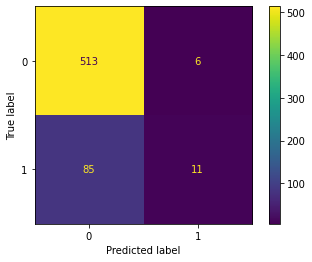

In [265]:
# plot confusion matrix using scikit-learn module
metrics.plot_confusion_matrix(logistic_reg, X_test, y_test);  

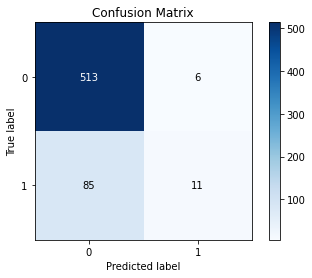

In [266]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

In [267]:
# check model precision
metrics.precision_score(y_test, pred_result)

0.6470588235294118

In [268]:
# check model recall
metrics.recall_score(y_test, pred_result)

0.11458333333333333

In [269]:
# check f1_score
metrics.f1_score(y_test, pred_result)

0.19469026548672563

In [270]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857860,0.647059,0.852033,0.752459,0.824954
recall,0.988439,0.114583,0.852033,0.551511,0.852033
f1-score,0.918532,0.194690,0.852033,0.556611,0.805542
support,519.000000,96.000000,0.852033,615.000000,615.000000


In [271]:
# generate probability prediction
pred_proba_result = logistic_reg.predict_proba(X_test)

In [272]:
# check result
pd.DataFrame(pred_proba_result).head(10)

,0,1
0,0.583168,0.416832
1,0.878226,0.121774
2,0.501855,0.498145
3,0.878923,0.121077
4,0.947926,0.052074
5,0.715253,0.284747
6,0.671190,0.328810
7,0.905787,0.094213
8,0.943528,0.056472
9,0.794089,0.205911


In [273]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.7182281631342324

In [274]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.41683243, 0.12177405, 0.49814546, 0.12107686, 0.05207362,
       0.2847468 , 0.32881003, 0.09421292, 0.05647224, 0.20591081])

ROC Curve

ROC Curve Using Scikit-Learn

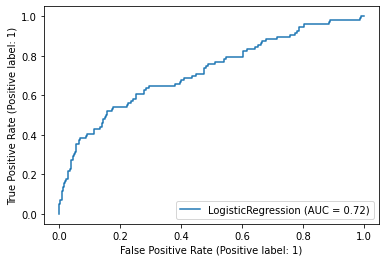

In [275]:
metrics.RocCurveDisplay.from_estimator(logistic_reg, X_test, y_test)

ROC Curve From Scikit-Plot

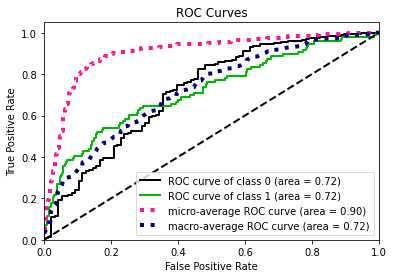

In [276]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

Handle Imbalance Class Dataset with G-Means

In [277]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [278]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [279]:
# see gmeans result
gmeans

array([0.        , 0.10206207, 0.22821773, 0.22777758, 0.26951007,
       0.26898827, 0.32150247, 0.32119018, 0.33686711, 0.33621108,
       0.36549998, 0.36514288, 0.39222637, 0.39145805, 0.40429613,
       0.40389879, 0.41632934, 0.4150982 , 0.45023722, 0.44979122,
       0.46089885, 0.45952508, 0.47033891, 0.46939917, 0.5102907 ,
       0.50824133, 0.52742695, 0.52689393, 0.53622021, 0.53513364,
       0.54428189, 0.54372848, 0.55271633, 0.5521532 , 0.57825341,
       0.57588836, 0.58429593, 0.58369449, 0.59197426, 0.59136366,
       0.59952079, 0.59329507, 0.60125912, 0.5999893 , 0.60783263,
       0.6000562 , 0.60770053, 0.60703963, 0.61458078, 0.60852565,
       0.61590199, 0.61384555, 0.62829095, 0.6268838 , 0.64097284,
       0.63808556, 0.64498398, 0.64351977, 0.65032969, 0.64958858,
       0.65632024, 0.65557059, 0.6622263 , 0.65613673, 0.66266562,
       0.66111914, 0.66756923, 0.64853721, 0.65474345, 0.65311676,
       0.65924944, 0.65512652, 0.66116468, 0.65949295, 0.66546

In [280]:
# find the best threshold
ix = np.argmax(gmeans)

In [281]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.1825944842959162, G-Mean=0.6748652902045924


In [282]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

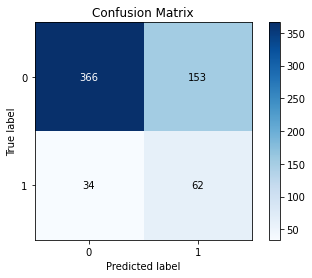

In [283]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [284]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.3987138263665595

In [285]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.19469026548672563

In [286]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.915000,0.288372,0.695935,0.601686,0.817185
recall,0.705202,0.645833,0.695935,0.675518,0.695935
f1-score,0.796518,0.398714,0.695935,0.597616,0.734422
support,519.000000,96.000000,0.695935,615.000000,615.000000


In [287]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.857860,0.647059,0.852033,0.752459,0.824954
recall,0.988439,0.114583,0.852033,0.551511,0.852033
f1-score,0.918532,0.194690,0.852033,0.556611,0.805542
support,519.000000,96.000000,0.852033,615.000000,615.000000


Model

Logistic Regression have accuracy about 0.85 which is greater than the treshold. So the model has the better result.

KNN

In [288]:
mr_data.head(5)

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,Complain,Response
0,58,635,88,546,172,88,88,3,8,0,1
1,38,11,1,6,2,1,6,2,1,0,0
2,26,426,49,127,111,21,42,1,8,0,0
3,26,11,4,20,10,3,5,2,2,0,0
4,94,173,43,118,46,27,15,5,5,0,0


In [289]:
df = pd.get_dummies(mr_data)

In [290]:
df = df.fillna(0)

In [291]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_over, y_over = oversampling.fit_resample(X_train,y_train)

In [292]:
y = mr_data['Response'].values
X = mr_data.drop(['Response'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

KNeighborsClassifier param:

```python
sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5, 
  *, 
  weights='uniform', 
  algorithm='auto', 
  leaf_size=30, 
  p=2, 
  metric='minkowski', 
  metric_params=None, 
  n_jobs=None
)
```

In [293]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [294]:
# prediction
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

In [295]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.880734,0.400000,0.826016,0.640367,0.808038
recall,0.919540,0.301075,0.826016,0.610308,0.826016
f1-score,0.899719,0.343558,0.826016,0.621639,0.815617
support,522.000000,93.000000,0.826016,615.000000,615.000000


In [296]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8260162601626017

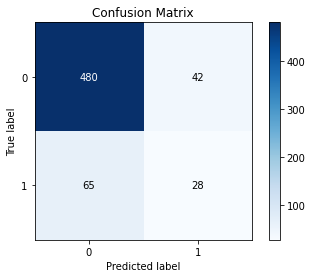

In [297]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


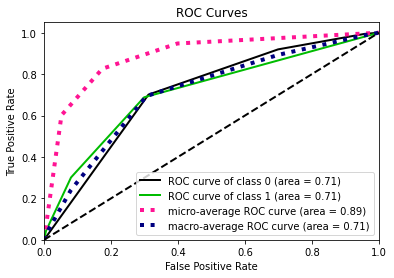

In [298]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [299]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.3435582822085889

Best Threshold=0.3333333333333333, G-Mean=0.6946304286855097


0.40894568690095845

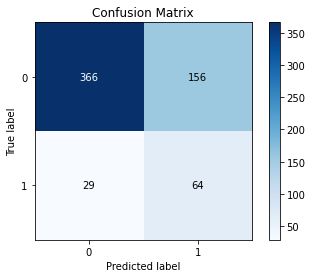

In [300]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);
# check f1-score
metrics.f1_score(y_test, new_pred_result)

From the KNN model that has been run, the accuracy value is 0.81 below the threshold, of course this model is not better

Even trying to do a confusion matrix calculation, it still doesn't get a better value, but the roc_curve value of the threshold (0.3) is better with a value of 0.39

# Naive Bayes

In [301]:
mr_data.head(5)

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,Complain,Response
0,58,635,88,546,172,88,88,3,8,0,1
1,38,11,1,6,2,1,6,2,1,0,0
2,26,426,49,127,111,21,42,1,8,0,0
3,26,11,4,20,10,3,5,2,2,0,0
4,94,173,43,118,46,27,15,5,5,0,0


In [302]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_over, y_over = oversampling.fit_resample(X_train,y_train)

In [303]:
y = mr_data['Response'].values
X = mr_data.drop(['Response'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [304]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [305]:
# prediction
pred_result = gnb.predict(X_test)
pred_proba_result = gnb.predict_proba(X_test)

In [306]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 615 points : 136


In [307]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.895492,0.330709,0.778862,0.613100,0.810086
recall,0.837165,0.451613,0.778862,0.644389,0.778862
f1-score,0.865347,0.381818,0.778862,0.623582,0.792228
support,522.000000,93.000000,0.778862,615.000000,615.000000


Navie bayes have accuracy about 0.84% which is lower than the treshold. So the model has the lower result.

**Conclusion
We can conclude the EDA and model**

EDA

Recent users are more likely Response campaign.

Logistic Regression is better model for this case than Navie bayes and KNN with about accuracy 0.85